# En el presente script veremos como cargar el modelo ya entrenado para poder usarlo y hacer predicciones

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras import models

from tensorflow.keras.utils import to_categorical

# base de datos de imagenes a color
from tensorflow.keras.datasets import cifar10

# Librería para separar datos:
from sklearn.model_selection import train_test_split

## Cargamos datos de entrenamiento y pruebas:

In [2]:
# cargamos los datos:
(train_data, train_labels), (complement_train_data, complement_train_labels) = cifar10.load_data()

# subdividimos el complemento de los datos de entrenamiento 
# para extraer datos de 'test' y 'validation' 

#  -Datos de entrenamiento: 100% de los datos de entrenamiento
#  -Datos de validation: 50% del complemento de entrenamiento
#  -Datos de test:       50% del complemento de entrenamiento

#p_train = 0.8 # porcentaje de datos de entrenamiento
p_validation=0.5  # porcentaje de datos de validación
p_test=0.5 # porcentaje de datos de pruebas

validation_data, test_data, validation_labels, test_labels = train_test_split (complement_train_data, complement_train_labels, test_size=p_validation, train_size=p_test, random_state=42)

In [3]:
# Imprimimos dimensiones:
print('\nLas dimensiones de los datos de entrenamiento son: ', train_data.shape)
print('Las dimensiones de los labels de entrenamiento son: ', train_labels.shape)

print('\nLas dimensiones de los datos de validación son: ', validation_data.shape)
print('Las dimensiones de los labels de validación son: ', validation_labels.shape)

print('\nLas dimensiones de los datos de prueba son: ', test_data.shape)
print('Las dimensiones de los labels de prueba son: ', test_labels.shape)


Las dimensiones de los datos de entrenamiento son:  (50000, 32, 32, 3)
Las dimensiones de los labels de entrenamiento son:  (50000, 1)

Las dimensiones de los datos de validación son:  (5000, 32, 32, 3)
Las dimensiones de los labels de validación son:  (5000, 1)

Las dimensiones de los datos de prueba son:  (5000, 32, 32, 3)
Las dimensiones de los labels de prueba son:  (5000, 1)


In [4]:
# Las etiquetas toman valores enteros entre 0 y 9, es decir, hay 10 clases posibles
classes = np.unique(train_labels)
print('valores de las clases: ',classes)

n_clases = len(classes)
n_clases

valores de las clases:  [0 1 2 3 4 5 6 7 8 9]


10

In [5]:
# Definimos el nombre de las etiquetas:
class_names = ['avion', 'auto','ave','gato','venado','perro','rana','caballo','barco','camion']

## Codificación de features (de entrenamiento, validación y pruebas) que pasarán por la red:

In [6]:
# No modificaremos las dimensiones de los features (cada uno esta en 3D), 
# pues las redes convolucionales se ajustan a estas dimensiones 

x_train = train_data
x_validation = validation_data
x_test = test_data

# normalizamos valores (dividiendo entre el máximo '255') para que los valores esten entre 0 y 1. 
# y los pasamos al tipo 'float32'
x_train = x_train.astype('float32')/255
x_validation = x_validation.astype('float32')/255
x_test = x_test.astype('float32')/255

## Debido a que entrenaremos la red usando la función de costo `loss = sparse_categorical_crossentropy`,
## no es necesario codificar las etiquetas en forma vectorial

In [7]:
y_train = train_labels
y_validation = validation_labels
y_test = test_labels

# Cargamos el modelo entrenado y lo usamos:

In [8]:
# Cargamos el modelo ya entrenado:
trained_model = models.load_model('modelo_entrenado_RNA3_CIFAR10.h5')

In [9]:
# visualzamos la arquitecura de la red:
trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               614550    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               3

In [10]:
# Una vez que hemos cargado el clasificador,
# lo aplicamos para generar etiquetas predichas:
y_predict = trained_model.predict(x_test)

y_predict.shape

(5000, 10)

### Cada etiqueta predicha por la red corresponde a un arreglo de tamaño 10.
### La posición del valor máximo de dicho arreglo corresponde al valor de la etiqueta predicha
### extraemos la posición del valor maximo usando `np.argmax`

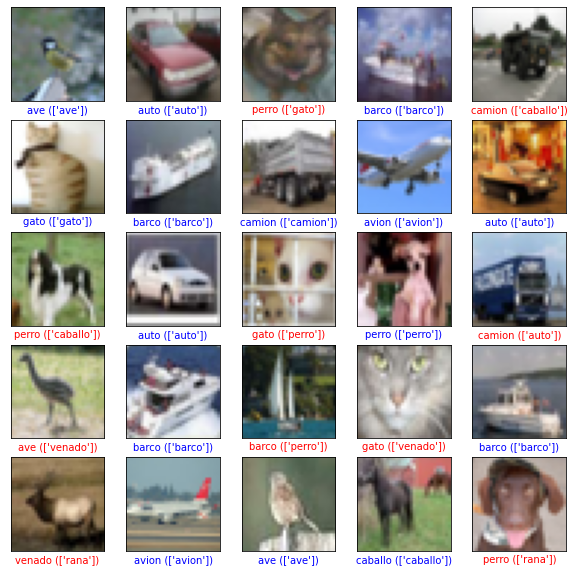

In [11]:
%matplotlib inline

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')   

    true_label =  y_test[i,0]    
    aprox_label = np.argmax( y_predict[i] )

    if true_label == aprox_label:
        col = 'blue'
    else:
        col = 'red'

    imagen = x_test[i,:].reshape(32,32,3)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel('{} ({})'.format( class_names[true_label], [class_names[aprox_label]]), color=col)